In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


In [2]:

# Load dataset
df = pd.read_csv("adult.csv")   # use correct file name

# View first 5 rows
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# Check dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Check missing values
df.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [5]:
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)


In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Features:", categorical_cols)
print("Numerical Features:", numerical_cols)


Categorical Features: Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')
Numerical Features: Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [7]:
le = LabelEncoder()

df['income'] = le.fit_transform(df['income'])


In [9]:
df_encoded = pd.get_dummies(
    df,
    columns=[
        'workclass',
        'education',
        'occupation',
        'relationship',
        'race',
        'sex'
    ],
    drop_first=True
)


In [10]:
df_encoded.head()


,age,fnlwgt,education.num,marital.status,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
1,82,132870,9,Widowed,0,4356,18,United-States,0,False,...,True,False,False,False,False,False,False,False,True,False
3,54,140359,4,Divorced,0,3900,40,United-States,0,False,...,False,False,False,True,False,False,False,False,True,False
4,41,264663,10,Separated,0,3900,40,United-States,0,False,...,False,False,True,False,False,False,False,False,True,False
5,34,216864,9,Divorced,0,3770,45,United-States,0,False,...,False,False,False,True,False,False,False,False,True,False
6,38,150601,6,Separated,0,3770,40,United-States,0,False,...,False,False,False,True,False,False,False,False,True,True


In [11]:
scaler = StandardScaler()

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [12]:
df_encoded[numerical_cols].describe()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04
mean,1.413453e-16,1.601913e-17,-2.996520e-16,-1.884604e-17,-3.015366e-17,-2.779791e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.632189e+00,-1.666094e+00,-3.577051e+00,-1.474446e-01,-2.185860e-01,-3.333218e+00
25%,-7.946967e-01,-6.830644e-01,-4.397382e-01,-1.474446e-01,-2.185860e-01,-7.773411e-02
50%,-1.094756e-01,-1.076072e-01,-4.757405e-02,-1.474446e-01,-2.185860e-01,-7.773411e-02
75%,6.518811e-01,4.527602e-01,1.128918e+00,-1.474446e-01,-2.185860e-01,3.396356e-01
max,3.925715e+00,1.225647e+01,2.305411e+00,1.335458e+01,1.055581e+01,4.847229e+00


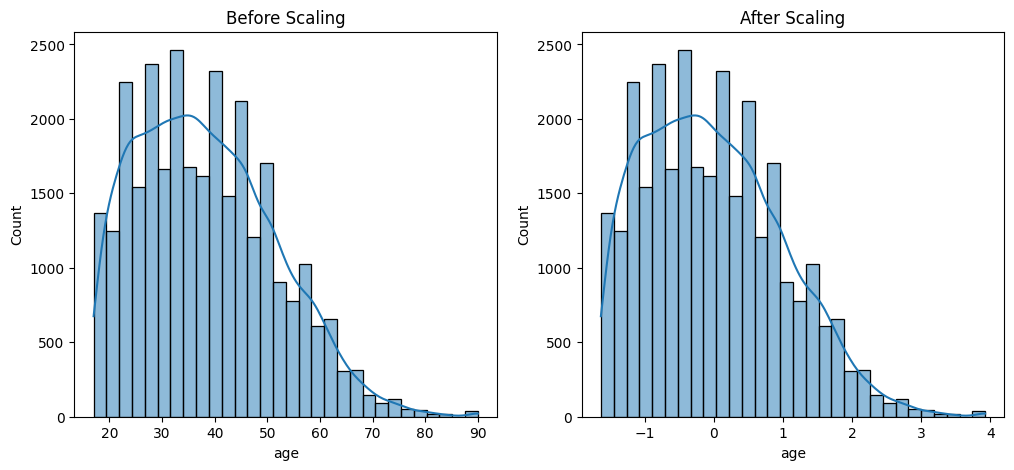

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Before Scaling")

plt.subplot(1,2,2)
sns.histplot(df_encoded['age'], bins=30, kde=True)
plt.title("After Scaling")

plt.show()


In [14]:
df_encoded.to_csv("adult_preprocessed.csv", index=False)
